In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('household_power_consumption.csv',sep=';')

C:\Users\652951\AppData\Local\Temp\ipykernel_16988\180054053.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.csv',sep=';')


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df = df[['Global_active_power','Global_reactive_power','Voltage']]


In [5]:
#hpc = pd.DataFrame(data = hpc)


In [6]:
df.replace('?', np.nan, inplace = True)

In [7]:
df.head()

,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.840
1,5.360,0.436,233.630
2,5.374,0.498,233.290
3,5.388,0.502,233.740
4,3.666,0.528,235.680


In [8]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf])
    return df[indices_to_keep].astype(np.float64)


In [9]:
clean_df =clean_dataset(df)

In [10]:
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 3 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
dtypes: float64(3)
memory usage: 62.5 MB


In [11]:
import mpl_toolkits.mplot3d

In [12]:
from sklearn.preprocessing import StandardScaler

def elbow_plot(clean_df):
   
    # Normalize the data
    scaled_df = StandardScaler().fit_transform(clean_df)

    # Initialize k-means parameters
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "random_state": 1,
    }

    # Calculate SSE for different values of k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_df)
        sse.append(kmeans.inertia_)

    # Visualize results (elbow plot)
    plt.plot(range(1, 11), sse)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.title("Elbow Method: Optimal Number of Clusters")
    plt.show()




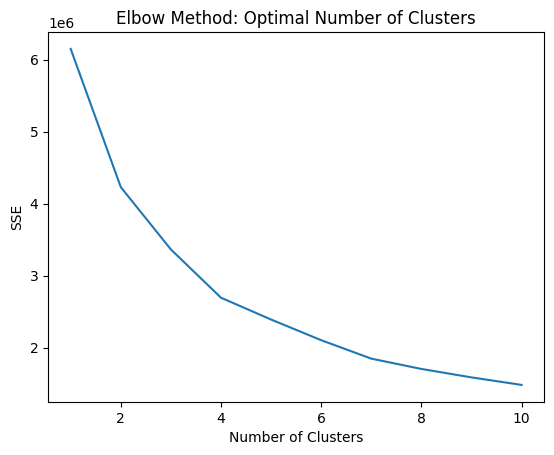

In [13]:
 elbow_plot(clean_df)

In [14]:
# Initialize k-means parameters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}

# Create a KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(clean_df)

# Get cluster labels
labels = kmeans.fit_predict(clean_df)

In [15]:
from mpl_toolkits.mplot3d import Axes3D


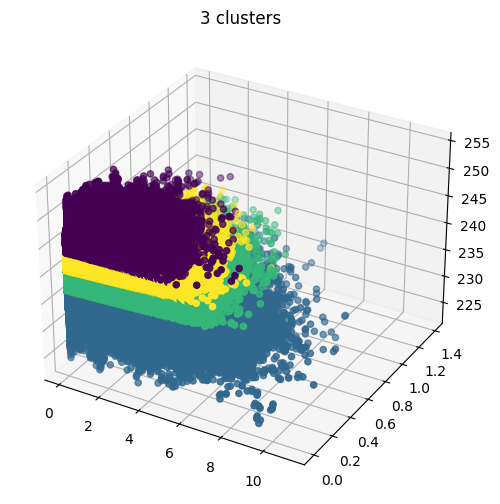

In [17]:
# Create a scatter plot
fig = plt.figure(figsize=(7, 6))  # Set the size of the figure
ax = fig.add_subplot(111, projection='3d')  # Create 3D axes

# Define which data is x, y, z
ax.scatter(clean_df['Global_active_power'], clean_df['Global_reactive_power'], clean_df['Voltage'], c=labels, cmap='viridis')

# Add labels to the plot and a title
ax.set_title("3 clusters")

# Show the plot
plt.show()


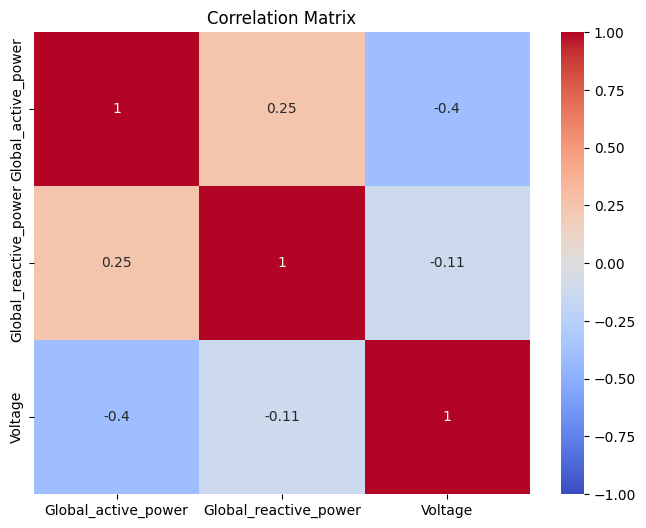

In [21]:
import seaborn as sns

corr_matrix = clean_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # specify the number of principled components
x_pca = pca.fit_transform(clean_df) # fit the model and transform the data to their new shape
# per new dimension, see what % of variation in the dataset it accounts for... 
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2) 
print("percent_variance=", percent_variance)



percent_variance= [91.96  7.93  0.1 ]


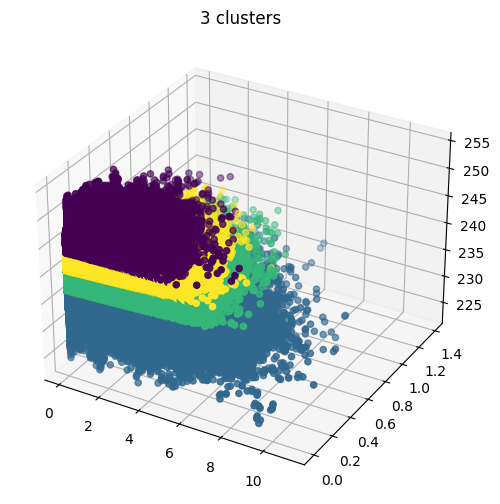

In [31]:
kmeans.fit(x_pca)

# Get cluster labels
labels = kmeans.fit_predict(x_pca)

# Create a scatter plot
fig = plt.figure(figsize=(7, 6))  # Set the size of the figure
ax = fig.add_subplot(111, projection='3d')  # Create 3D axes

# Define which data is x, y, z
ax.scatter(clean_df['Global_active_power'], clean_df['Global_reactive_power'], clean_df['Voltage'], c=labels, cmap='viridis')

# Add labels to the plot and a title
ax.set_title("3 clusters")

# Show the plot
plt.show()